# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Откроем файл, изучим общую информацию

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

In [2]:
# Сохораним датасет в переменную df и выведем первые 10 строк
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# Посмотрим общую информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


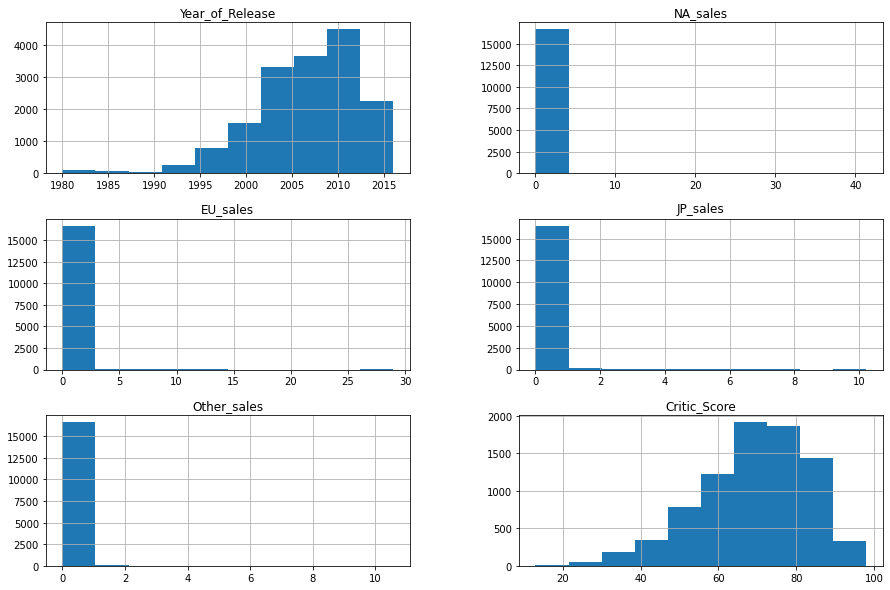

In [4]:
# Посмотрим гисторгаммы для визуального представления данных
df.hist(figsize=(15, 10));

In [5]:
# Проверим наличие явных дубликатов
df.duplicated().sum()

0

**Явных дубликатов нет.**

**Описание столбцов датасета**
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Общее количество строк в датасете - 16715.

### Вывод

**В датасете 16715 строк.**

**Видим наличие пропусков по количеству пропусков можно разделить на 2 группы:**
1. Небольшое количество пропусков 
`Name`, `Year_of_Release`, `Genre` - данные с пропусками можно удалить, т.к. пропусков меньше 5% данных, не повлияет на дальнейший анализ данных.
2. Большое количество пропусков
`Critic_Score`, `User_Score`, `Rating` - большое количество пропусков, данные с пропусками не будем удалять.

**Названия столбцов начинаются с заглавной буквы, приведем их к общему виду с нижним регистром всех букв.**

Необходимо проверить на наличие неявных дубликатов в столбцах.

В столбце `Year_of_Release` и `Critic_Score` изменим тип данных на int.

## Предобработка данных

В ходе предобработки данных:
1. Названия столбцов приведем к нижнему регистру.
2. Приведем значения в столбце `User_Score` к шкале 0 - 100.
3. Изменим типы данных в столбцах `Year_of_Release`, `User_Score`, `Critic_Score`
4. Заполним или удалим строки с пропусками данных
5. Удалим неявные дубликаты (если они есть) и аномальные значения в данных

### Приведем названия столбцов к общему виду

In [6]:
df = df.rename(
    columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
    })

# Проверим названия столбцов
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Удалим пропуски в столбцах с малым количеством пропусков

In [7]:
# Определим количество пропусков в столбцах
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Удалим пропуски из столбцов name, year_of_release, genre и сохраним данные в новом датасете data
data = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [9]:
# Проверим удалились ли строки с пропусками.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
# Проверим сколько процентов данных осталось от изначального датасета
data.shape[0]/df.shape[0] * 100

98.37870176488184

**Количество данных уменьшилось менее чем на 2% от изначального датасета**

### Изменим типы данных в столбцах `year_of_release`,  `critic_score`, `user_score` и заполним пропуски

In [11]:
# Заменим тип данных в столбце year_of_release на int16 т.к. года в целых числах
data['year_of_release'] = data['year_of_release'].astype('int16')

Так как в столбце `critic_score` 7983 пропусков, мы не можем удалить такое большое количество пропусков т.к. это может исказить данные.

Также не следует заполнять пропуски в медианным и средним значением т.к. значение оценки критиками очень вариативно и это может исказить данные.

Заполним пропуска значением -1 для того, чтобы эти данные выделялись из датасета и изменим на тип данных int16, т.к. в столбце `critic_score` целые числа

In [12]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype('int16')

Посмотим на уникальные значения в столбце `user_score`

In [13]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце `user_score` есть значение **tbd** (To Be Determined) это значит, что на данный момент оценка игры игроками не определена, заменим значения **tbd** на **-1**. Так же заполним пропуски в данных значением **-1**. Не будем заполнять пропуски медианным или средним значением т.к. оценки очень вариативны и мы не можем их оценить.

Приведем оценки пользователей к такому же виду как и оценки критиков, т.е приведем к шкале от 0 до 100

In [14]:
# Заменим значения tbd на значение -1
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

# Заполним пропуски значением -1
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype('float32')

# Переведем значения в шкалу от 0 до 100
data['user_score'] = (data['user_score'] * 10).astype('int16')

# Избавимся от значений -10, заменим их на -1
data['user_score'] = data['user_score'].replace(-10, -1)

# Выведем первые 5 строк датасета
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NaN


### Заполненим пропуски в столбце `rating` и удалим неявные дубликаты

In [15]:
# Посмотрим на уникальные значения в столбце rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце `rating` мы видим ***8*** уникальных значений и ***nan*** (пропуски в данных).

* **EC** - Для детей младшего возраста (Early childhood), для детей от 3 лет;
* **E** - Для всех (Everyone), первоначально рейтинг был **"K-A" ("Kids to Adults")**;
* **E10+** - Для всех от 10 и старше (Everyone 10 and older);
* **T** - Подросткам (Teen), для лиц от 13 лет;
* **M** - Для взрослых (Mature), не подходит для лиц младше 17 лет;
* **AO** - Только для взрослых (Adults Only 18+), только для вхрослых старше 18 лет
* **K-A** - Устаревшее, сейчас используется рейтинг **E**;
* **RP** - Рейтинг ожидается (Rating Pending), Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;

Рейтинг **RP** заменим на **NA** т.к. по факту рейтинг еще не выставлен. Также пропуски в данных заменим на значение **NA**.

Заменим устаревшее значение рейтинга **K-A** на современное **E**, тем самым устраним неявные дубликаты в столбце `rating`.

In [16]:
# Заменим рейтинг RP на -1 и заполним пропуски значениями -1
data['rating'] = data['rating'].replace('RP', 'NA')
data['rating'] = data['rating'].fillna('NA')

In [17]:
# Заменим рейтинг K-A на E
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].unique()

array(['E', 'NA', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

### Просмотрим датасет после предобработки данных

In [18]:
# Выведем первые 5 строк датасета
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NA
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NA


In [19]:
# Выведем общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int16  
 9   user_score       16444 non-null  int16  
 10  rating           16444 non-null  object 
dtypes: float64(4), int16(3), object(4)
memory usage: 1.1+ MB


### Отобразим графики распределения оценок и рейтингов по годам

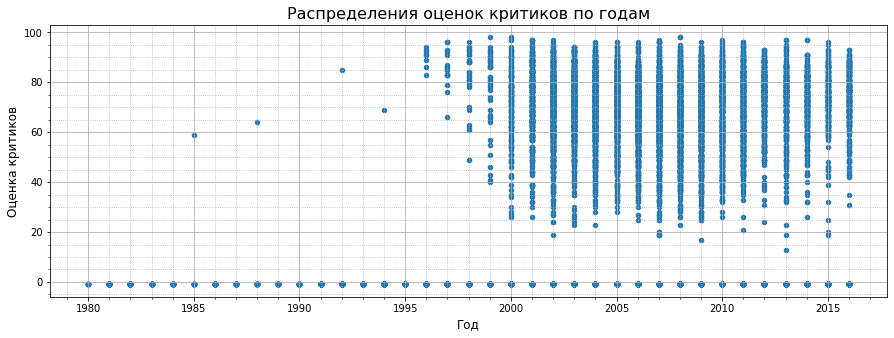

In [20]:
# Построим график распределения оценок критиков по годам
data.plot(x='year_of_release',
          y='critic_score',
          kind='scatter',
          figsize=(15, 5),
          grid=True);

plt.title('Распределения оценок критиков по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Оценка критиков', fontsize=12)
plt.minorticks_on()
plt.grid(which='minor',
        linestyle=':')
plt.show()

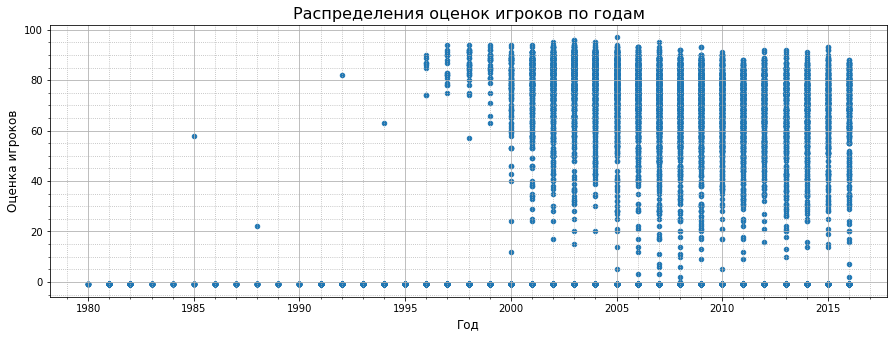

In [21]:
# Построим график распределения оценок пользователей по годам
data.plot(x='year_of_release',
          y='user_score',
          kind='scatter',
          figsize=(15, 5),
          grid=True)

plt.title('Распределения оценок игроков по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Оценка игроков', fontsize=12)
plt.minorticks_on()
plt.grid(which='minor',
        linestyle=':')
plt.show()

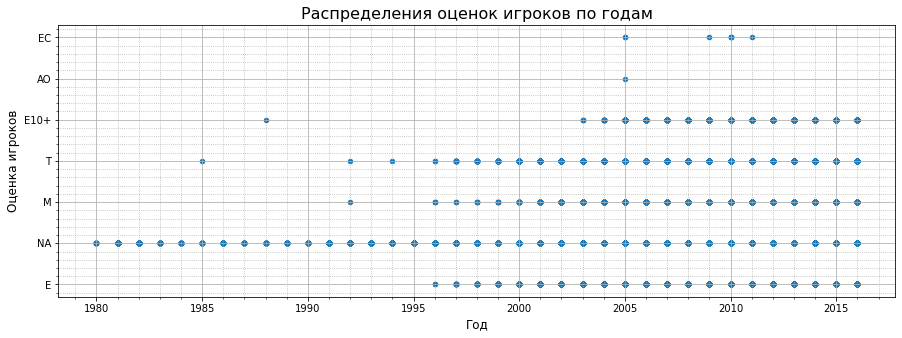

In [22]:
# Посмотрим применились ли изменения
data.plot(x='year_of_release',
          y='rating',
          kind='scatter',
          figsize=(15, 5),
          grid=True)
plt.title('Распределения оценок игроков по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Оценка игроков', fontsize=12)
plt.minorticks_on()
plt.grid(which='minor',
        linestyle=':')
plt.show()

Из графиков видно, что до 1996 года практически нет оценок и не определены возрастные рейтинги игр

### Создадим новый столбец в датасете 
В данные отсутствует столбец с общими сборами игры, создадим столбец `total_sales` и просуммруем значения столбцов `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Выведем первые 5 строк датасете
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NA,31.38


In [24]:
# Посмотрим на общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int16  
 9   user_score       16444 non-null  int16  
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(5), int16(3), object(4)
memory usage: 1.2+ MB


In [25]:
# Посмотрим статистики по датасету
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,31.796217,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,37.369529,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,73.000000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000,82.540000


По статистиками можем увидеть, что нет явно выбивающихся значений в датасете.

### Вывод по разделу.

В ходе предобработки данных было сделано:
- Приведены названия столбцов к единому виду, названия теперь пишутся в нижнем регистре;
- Удалены строки с пропусками в столбцах `name`, `year_of_release` и `genre`;
- Изменены типы данных в столбцах `year_of_release`,  `critic_score` и `user_score`;
- Пропуски в столбцах `critic_score`, `user_score` были заполнены значением -1;
- Значения в столбце `user_score` приведены к шкале 0 - 100;
- Пропуски в столбце `rating` были заполнены значением 'NA';
- Добавлен столбец `total_sales` с общими сборами.
    
Появление пропусков в данных, вероятно, связано с тем, что до 1996 года не выставлялись возрастные рейтинги и оценки критиков и игроков. Также, возможно, что не для всех игр выставляются оценки и рейтинг, если посмотреть на последние 5 игр из таблицы, то мы увидим, что у игр с маленькими сборами нет оценок и рейтинга.

## Исследовательский анализ данных

### Рассмотрим количество выпущенных игр по годам.

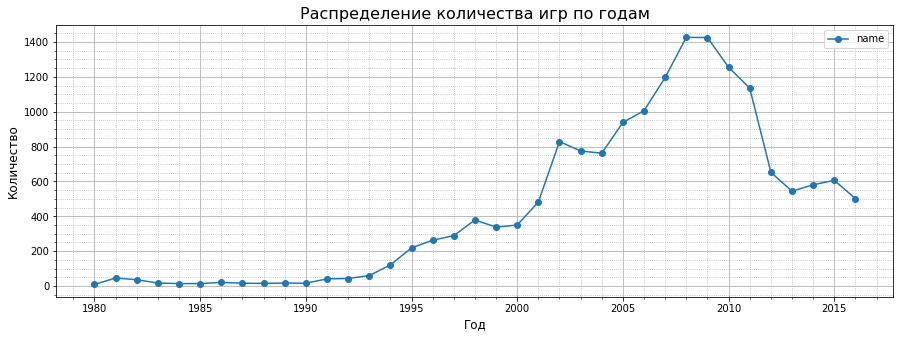

In [27]:
# Построим график распределения количества выпущенных игр по годам
data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .plot(figsize=(15, 5), grid=True, marker='o');

plt.minorticks_on()
plt.grid(which='minor',
        linestyle=':')
plt.title('Распределение количества игр по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

In [28]:
# Выведем сводную таблицу с количеством игр
data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


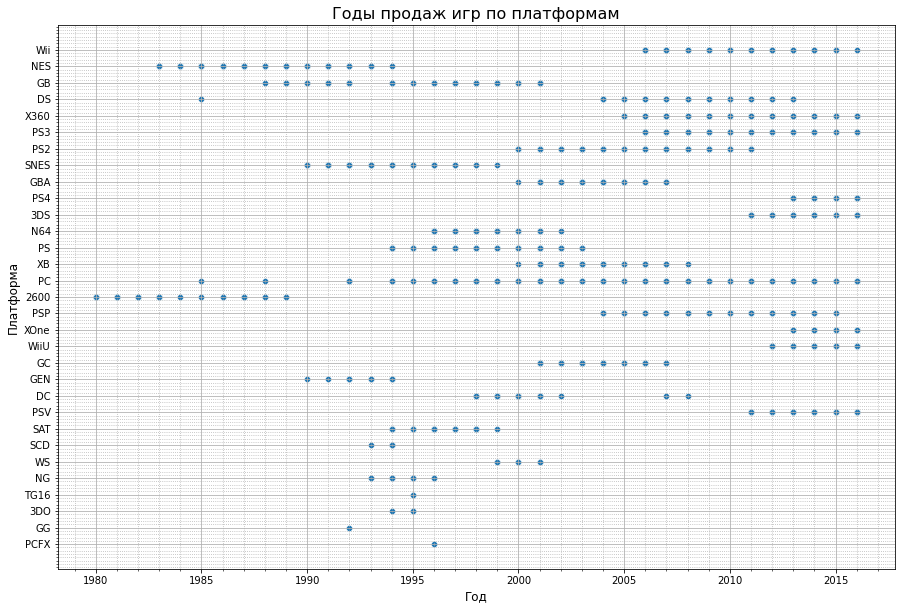

In [29]:
# Посмотрим в какие годы продовались игры под определенную платформу
plt.figure(figsize=(15,10))
plt.grid(True)
sns.scatterplot(x='year_of_release', y='platform', data=data);

plt.minorticks_on()
plt.grid(which='minor',
        linestyle='dotted')
plt.title('Годы продаж игр по платформам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.show()

По графику "Распределение количества игр по годам" и сводной таблице видно, что до 1994 года в продаже было менее 100 игр, после 1994 года мы видим по графику более резкий рост количества продаваемых игр.

Пик релизов игр был в 2008 - 2009 годах (более 1400 игр в год), далее количество релизов идет на спад.

По графику "Годы продаж игр по платформам" мы видим, что многие платформы уже не актуальны и для этих платформ игры уже не продаются.

По платформе DS по графику видно, что первые игры для нее были выпущены в 1985 году, что является ошибкой. Платформа Nintendo DS была выпущена в 2004 году.

In [30]:
# Выведем игру с ошибкой по платформк DS
data.loc[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1,NA,0.02


In [31]:
# Удалим угру с ошибкой из датасета
data.drop(index=15704, inplace=True)

In [32]:
data.reset_index(drop=True).tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,-1,-1,NA,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,-1,-1,NA,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,-1,-1,NA,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,-1,-1,NA,0.01
16442,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,-1,-1,NA,0.01


### Посмотрим как изменялись продажи по платформам.

In [33]:
# Выведем таблицу с 10 самыми продоваемыми платформами.
index = pd.Series([range(0, 10)])
top_platforms_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False).head(10)

top_platforms_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


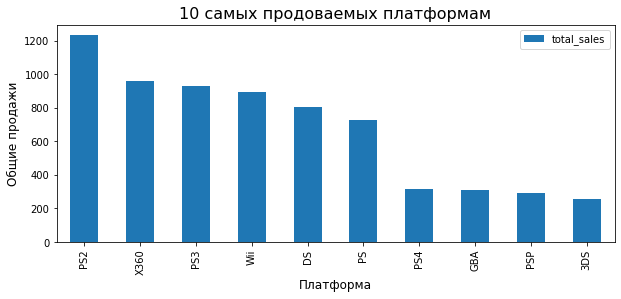

In [34]:
top_platforms_sales.plot(kind='bar', figsize=(10, 4));
plt.title('10 самых продоваемых платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общие продажи', fontsize=12)
plt.show()

<Figure size 1080x288 with 0 Axes>

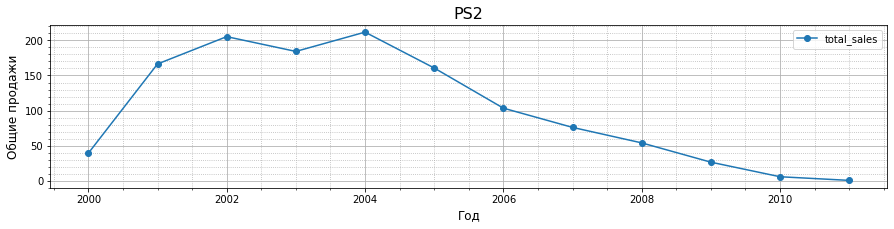

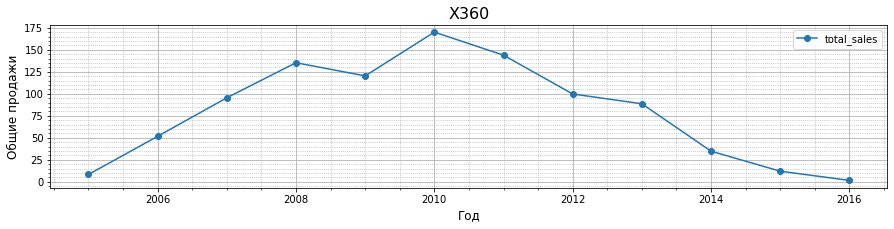

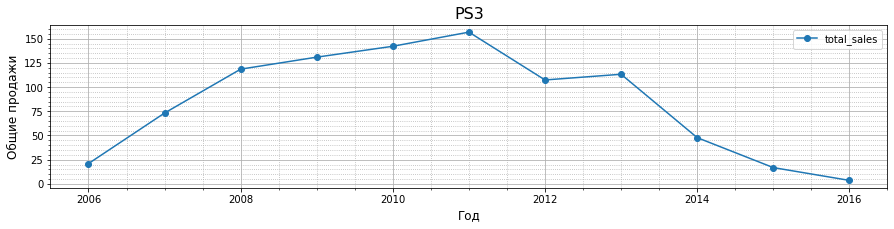

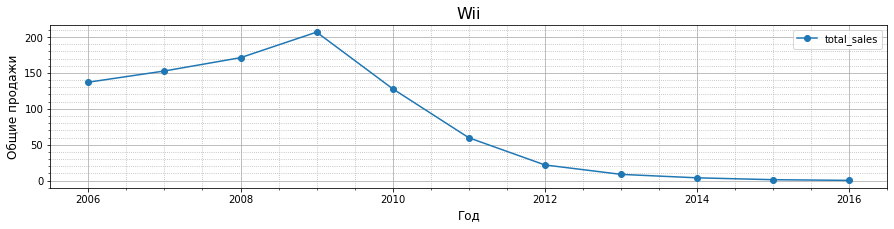

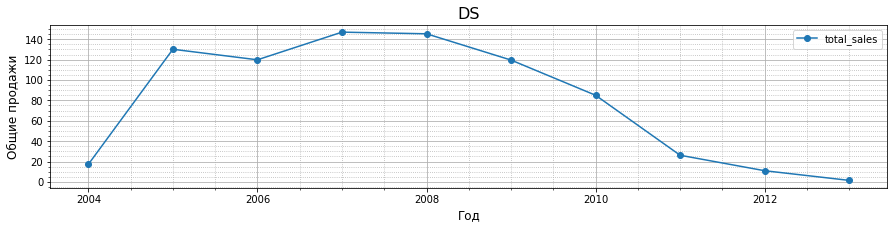

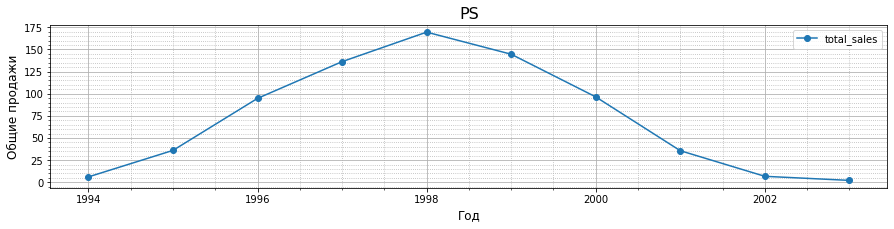

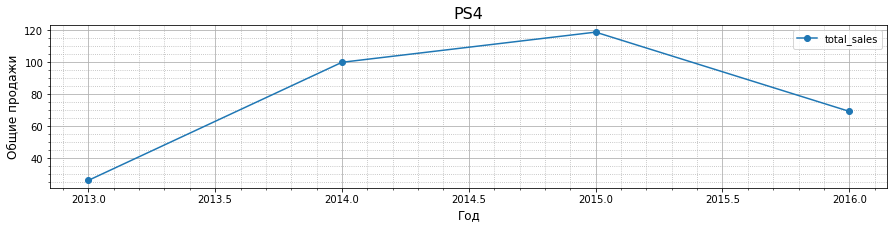

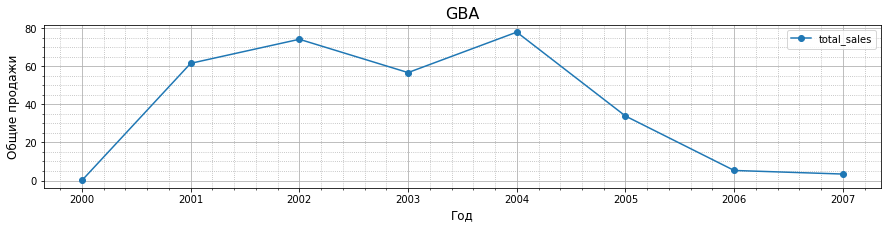

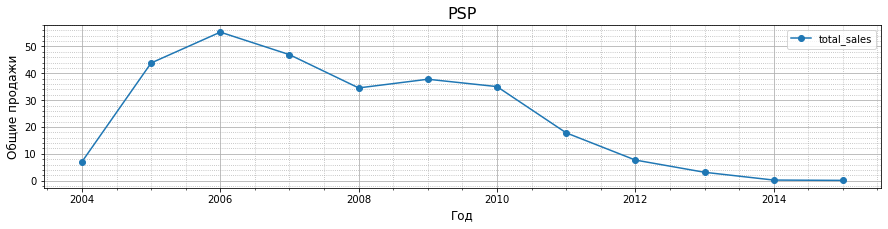

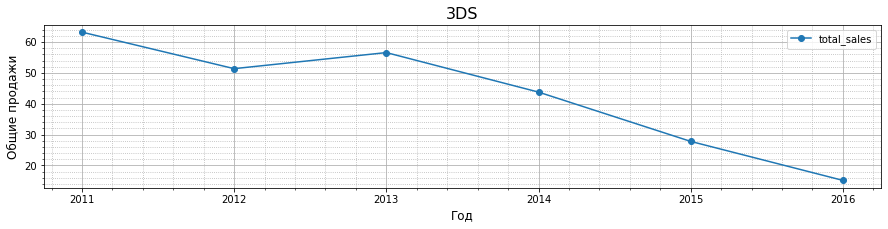

In [35]:
# Выведем графики продаж по годам для самых продоваемых платформ.
plt.figure(figsize=(15, 4));
for platform in top_platforms_sales.index:
    data.loc[data['platform'] == platform].pivot_table(index='year_of_release', 
                                                       values='total_sales', 
                                                       aggfunc='sum').plot(figsize=(15, 3),
                                                                          grid=True,
                                                                          marker='o')
    plt.minorticks_on()
    plt.grid(which='minor',linestyle='dotted')
    plt.title(platform, fontsize=16)
    plt.xlabel('Год', fontsize=12)
    plt.ylabel('Общие продажи', fontsize=12)
    plt.show()


По графикам топ 10 самых продоваемых платформ можно увидеть:
 - Платформы PS2, DS, PS, GBA уже устарели и сейчас по ним нет продаж;
 - По платформам X360, PS3, Wii, PSP, 3DS мы видим плавное снижение продаж, можно сказать, что они сейчас не настолько актуальны;
 - По платформе PS4 мы видим хорошие продажи - актуальная на данный период платформа.

### Рассмотрим за какой срок появляются новые и исчезают старые платформы

Построим своднуб табдицу по каждой платформе с столбцами: 
 - `max` - последний год;
 - `min` - первый год;
 - `ptp` - срок жизни платформы.

In [36]:
# Построим сводную таблицу
data.pivot_table(index='platform', values='year_of_release', aggfunc=('min', 'max', np.ptp))\
    .sort_values(by='ptp', ascending=False)

,max,min,ptp
platform,,,
PC,2016,1985,31
GB,2001,1988,13
NES,1994,1983,11
X360,2016,2005,11
PSP,2015,2004,11
PS2,2011,2000,11
DC,2008,1998,10
Wii,2016,2006,10
PS3,2016,2006,10


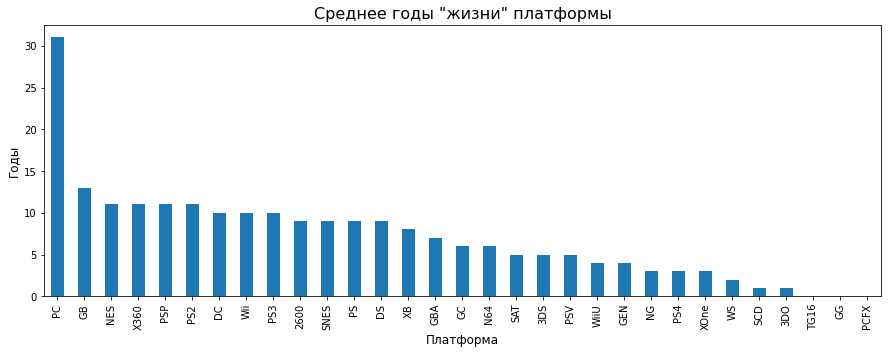

In [37]:
(data.pivot_table(index='platform', values='year_of_release', aggfunc=('min', 'max', np.ptp))\
    .sort_values(by='ptp', ascending=False))['ptp'].plot(kind='bar', figsize=(15,5));

plt.title('Среднее годы "жизни" платформы', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Годы', fontsize=12)
plt.show()

По графикам продаж по годам для самых продоваемых платформ, графику "Годы продаж игр по платформам" и сводной таблице мы видим, что **срок жизни платформы чаще всего составляет 9 - 11 лет (10 лет в среднем).**

Также по графикам продаж 10 самых продоваемых игр для платформ мы видим, что есть платформы с падающим спросом на игры, например платформы PS3, PSP и X360, это связано с тем, что их заменяет новое поколение консолей PS4, PSV и XOne. 

Для того чтобы исключить из дальнейшего анализа неактуальные платформы будем использовать данные за последние 4 года, т.к данные за 2016 год могут быть неполными

### Возьмем данные за актуальный период

In [38]:
# Создадим датасет actual_data с данными начиная с 2013 года.
actual_data = data.loc[data['year_of_release'] >= 2013].reset_index(drop=True)
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,NA,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,NA,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1,NA,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1,NA,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1,NA,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1,NA,0.01


### Посмотрим какие платформы лидируют по продажам.

In [39]:
# Выведем топ-5 самых прибыльных платформ в период с 2013 - 2016 г.
actual_data.pivot_table(index='platform', 
                        values='total_sales', 
                        aggfunc='sum').sort_values(by='total_sales',
                                                   ascending=False).head()

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


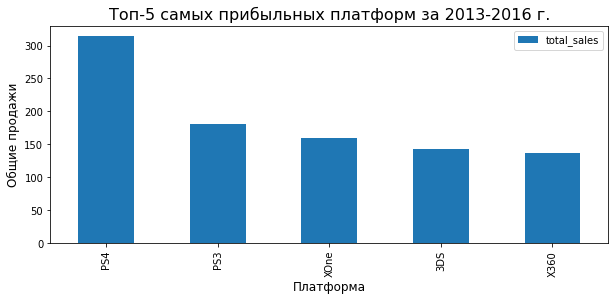

In [40]:
actual_data.pivot_table(index='platform', 
                        values='total_sales', 
                        aggfunc='sum').sort_values(by='total_sales',
                                                   ascending=False).head().plot(kind='bar', figsize=(10, 4));
plt.title('Топ-5 самых прибыльных платформ за 2013-2016 г.', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общие продажи', fontsize=12)
plt.show()

Самыми прибыльными платформами являются **PS4, XOne** и **3DS**

In [41]:
# Создадим сводную таблицу по продажам игр актуальных платформ
actual_sales = actual_data.pivot_table(index='year_of_release', 
                                       values='total_sales', 
                                       columns='platform', 
                                       aggfunc='sum')
actual_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [42]:
# Создадим сводную таблицу по релизам игр для актуальных платформ
actual_releases = actual_data.pivot_table(index='year_of_release', 
                                          values='total_sales', 
                                          columns='platform', 
                                          aggfunc='count')
actual_releases

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,91.0,8.0,38.0,126.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
2014,80.0,NaN,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0
2015,86.0,NaN,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0
2016,46.0,NaN,54.0,38.0,164.0,NaN,85.0,1.0,14.0,13.0,87.0


По таблицам видно, что по платформе **DS** игры после 2013 года не выпускаются и не продаются, удалим данные по платформе **DS** из таблиц.

In [43]:
# Удалим данные по платформе DS
actual_sales = actual_sales.drop('DS', axis=1)
actual_releases = actual_releases.drop('DS', axis=1)

Построим графики по продажам и релизам игр по платформам, чтобы определить потенциально прибыльные платформы

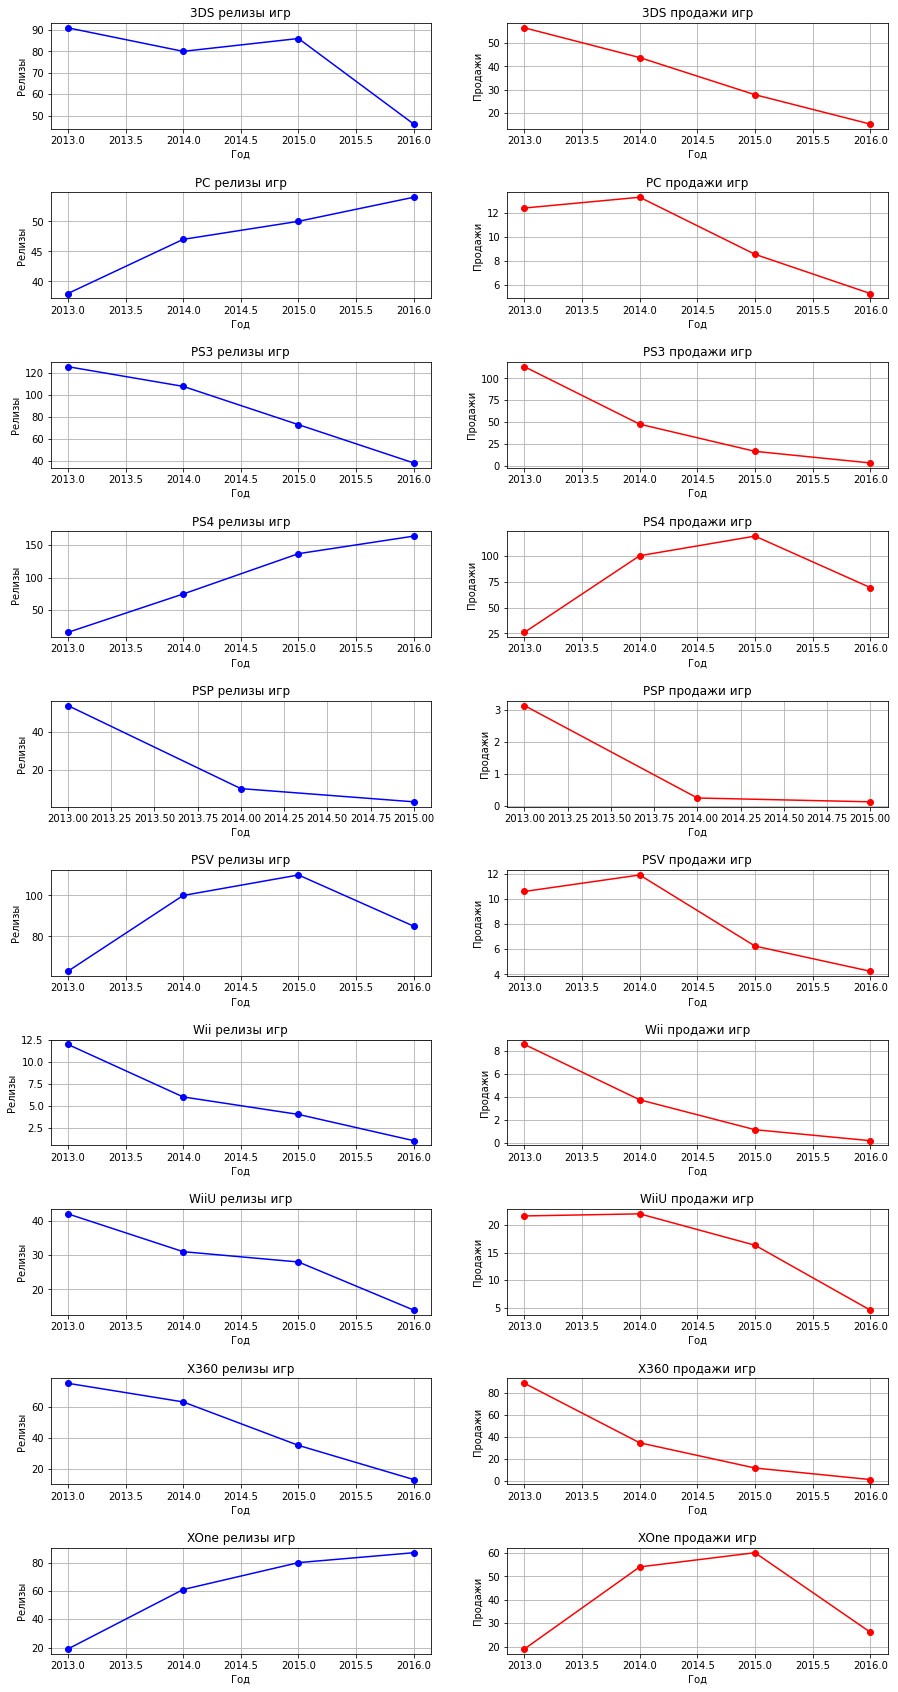

In [44]:
fig, ax = plt.subplots(10, 2, figsize=(15, 30))
for index, platform in enumerate(actual_releases):
    ax[index][0].plot(actual_releases.index, actual_releases[platform], 'o-b')
    ax[index][0].grid()
    ax[index][0].set(xlabel='Год', ylabel='Релизы', title=f'{platform} релизы игр')
    
    ax[index][1].plot(actual_sales.index, actual_sales[platform], 'o-r')
    ax[index][1].grid()
    ax[index][1].set(xlabel='Год', ylabel='Продажи', title=f'{platform} продажи игр')
    
plt.subplots_adjust(wspace=0.2, hspace=0.6)


По графикам продаж и релизов игр по платформам видно:
 - Платформа PSP в 2017 году не будет актуальна, т.к. в 2016 году нет продаж и релизов новых игр;
 - По платформам **3DS, PS3, Wii, WiiU, X360** видено, что сокращаются релизы и продажи игр, судя по тренду, релизов в 2017 году может не быть для этих платформ, а следовательно и продаж;
 - Виден рост релизов по платформам **PC, PS4, PSV, XOne**.

**Наиболее перспективными платформами являются PC, PS4, XOne, PSV**.

По платфорамам **PC, PS4, XOne** виден уверенный тренд на последние 4 года по релизам, также исходя из таблицы "Топ 5 самых прибыльных платформ за 2013-2016 г" платформы **PS4, XOne** занимают 1 и 3 место соответственно.

Платформа **PC** является перспективной т.к. игры для данной платформы выпускаются с 1985 года по сегодняшний день.

По платформе **PSV** видно уменьшение релизов и продаж, но предполагаю, что в 2017 году продажи игр также будут, т.к. довольно много релизов в 2016 году, также в отличие от остальных платформ, **PSV** является мобильной платформой.


### Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

In [45]:
# Создадим переменную со списком перспективных платформам
perspective_platforms = ['PC', 'PS4', 'XOne', 'PSV']

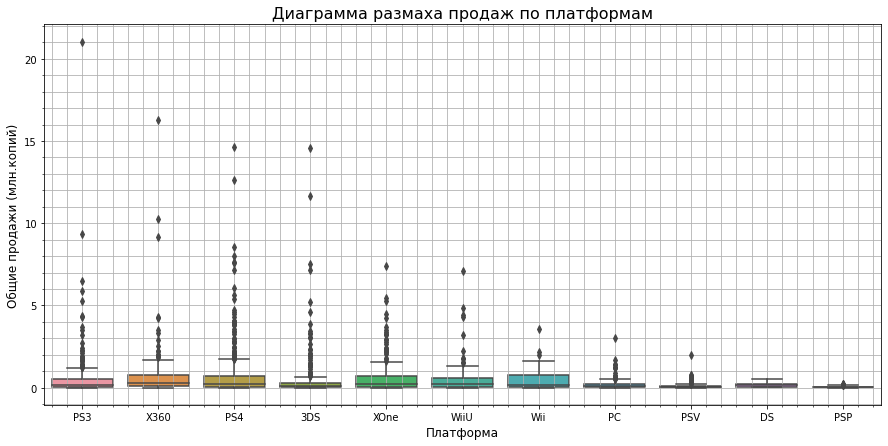

In [46]:
# Построим диаграмму размаха по продажам платформ за актуальный период
plt.figure(figsize=(15, 7))

plt.title('Диаграмма размаха продаж по платформам', fontsize=16)
sns.boxplot(x=actual_data['platform'],
            y=actual_data['total_sales'])

plt.minorticks_on()
plt.grid(which='both')
plt.ylabel('Общие продажи (млн.копий)', fontsize=12)
plt.xlabel('Платформа', fontsize=12)

plt.show()

Text(0.5, 0, 'Платформа')

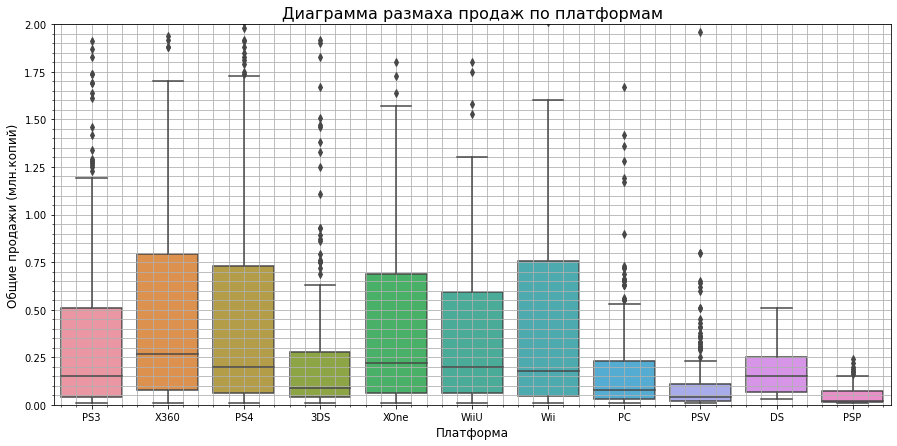

In [47]:
plt.figure(figsize=(15, 7))
plt.title('Диаграмма размаха продаж по платформам', fontsize=16)
sns.boxplot(x=actual_data['platform'],
            y=actual_data['total_sales'])

plt.ylim(0, 2)
plt.minorticks_on()
plt.grid(which='both')
plt.ylabel('Общие продажи (млн.копий)', fontsize=12)
plt.xlabel('Платформа', fontsize=12)

In [48]:
# Посмотрим статистики по платформам за актуальный период
actual_data.groupby(by='platform')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05


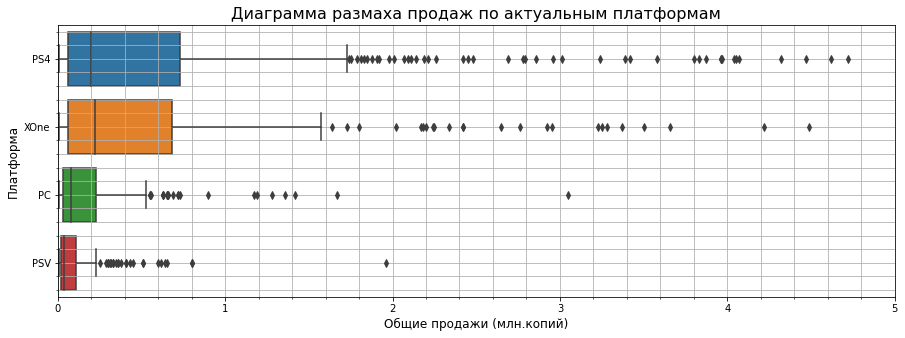

In [49]:
# Построим диаграмму размаха по продажам перспективных платформ
plt.figure(figsize=(15, 5))

plt.title('Диаграмма размаха продаж по актуальным платформам', fontsize=16)
sns.boxplot(x=actual_data.query('platform in @perspective_platforms')['total_sales'],
            y=actual_data.query('platform in @perspective_platforms')['platform'],)

plt.xlim(0, 5)
plt.minorticks_on()
plt.grid(which='both')
plt.xlabel('Общие продажи (млн.копий)', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.show()

In [50]:
# Посмотрим на статистики по актуальным платфорам в табличном виде
actual_data.query('platform in @perspective_platforms')[['total_sales', 'platform']]\
    .pivot_table(index='platform', values='total_sales', aggfunc='describe')\
    .sort_values(by='max', ascending=False)

,25%,50%,75%,count,max,mean,min,std
platform,,,,,,,,
PS4,0.06,0.20,0.730,392.0,14.63,0.801378,0.01,1.609456
XOne,0.06,0.22,0.685,247.0,7.39,0.645020,0.01,1.036139
PC,0.03,0.08,0.230,189.0,3.05,0.208624,0.01,0.352304
PSV,0.02,0.04,0.110,358.0,1.96,0.092151,0.01,0.153816


По диаграммах размаха видно:
- Очень хорошо продаются игры для консолей (PS4, PS3, X360, XOne, Wii), так же по консолям наибольшее количество выбросов, т.е. очень хорошо продоваемых игр.
- Наибольшие медианные продажи у платформ X360, XOne, PS4, WiiU - более 0.2 млн. копий.
- Игры для мобильных платформ продаются гораздо меньшим количеством. Исключением является платформа  Nintendo WiiU (медианные продажи - 0.2 млн.копий, максимальные 7.09), далее по продажам идет платформа Nintendo 3DS.
- Самые большие продажи одной игры на платформе PS3 (21.05 млн.копий), далее идут X360, PS4, 3DS
- Схожи продажи по платформам PC и 3DS, но платформе 3DS видно много выюросов (т.е хитов продаж), самая хитовая игра для 3DS разошлась  в 14.6 млн. копий.
- Самыми маленькими платформами по продажам являются платформы PSP, PSV.

### Влияние отзывов покупателей и критиков на продажи

Посмотрим как влияют отзывы критиков и покупателей на общие продажи игр, для этого проведем анализ по платформе PS4, т.к это актуальная платформа с самыми большими общими продажами.

In [51]:
# Комментарий ревьюера
print(len(actual_data.query('critic_score != -1')))
print(len(actual_data.query('user_score != -1')))
print(len(actual_data.query('critic_score != -1 and user_score != -1')))

991
1192
976


In [52]:
# Возьмем срез данных по платформе PS4 и запишем его в переменную ps4_data
# исключим из среза строки без оценок критиков и пользователей
#ps4_data = actual_data.query('platform == "PS4" and critic_score != -1 and user_score != -1')\
#    .reset_index(drop=True)

ps4_data = actual_data.query('platform == "PS4"')

display(ps4_data.head())
ps4_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,NA,14.63
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
10,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1,NA,7.98
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 2 to 2190
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int16  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     392 non-null    int16  
 9   user_score       392 non-null    int16  
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(5), int16(3), object(4)
memory usage: 32.9+ KB


In [53]:
ps4_data[ps4_data['critic_score'] != -1]['critic_score']

4       97
9       82
11      83
12      85
15      87
        ..
2158    42
2162    70
2163    69
2173    61
2174    51
Name: critic_score, Length: 252, dtype: int16

В срезе по играм платформы PS4 осталось 392 игры.

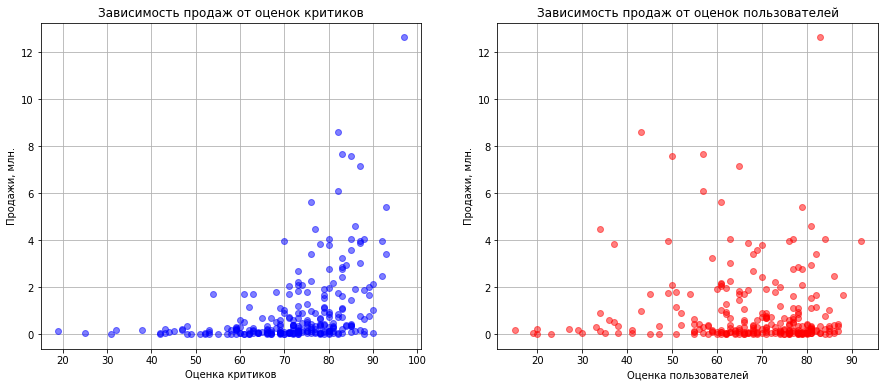

In [54]:
# Построим диаграммы рассеяния как оценки критиков и пользоватей влияют на общие продажи
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
#ax[0].plot(ps4_data['critic_score'], ps4_data['total_sales'], 'o', color='b', alpha=0.5)
ax[0].plot(ps4_data[ps4_data['critic_score'] != -1]['critic_score'],
           ps4_data[ps4_data['critic_score'] != -1]['total_sales'], 
           'o', color='b', alpha=0.5)
ax[0].grid()
ax[0].set(xlabel='Оценка критиков', ylabel='Продажи, млн.', title='Зависимость продаж от оценок критиков')

#ax[1].plot(ps4_data['user_score'], ps4_data['total_sales'], 'o', color='r', alpha=0.5)
ax[1].plot(ps4_data[ps4_data['user_score'] != -1]['user_score'],
            ps4_data[ps4_data['user_score'] != -1]['total_sales'], 
           'o', color='r', alpha=0.5)
ax[1].set(xlabel='Оценка пользователей', ylabel='Продажи, млн.', title='Зависимость продаж от оценок пользователей')
ax[1].grid()

In [55]:
# посмотрим на корреляцию продаж и оценок пользователей и критиков
print('Платформа PlayStation 4')
print(f"\tКоэффициент корреляции оценки критиков и продаж - {ps4_data['critic_score'].corr(ps4_data['total_sales'])}")
print(f"\tКоэффициент корреляции оценки пользователей и продаж - {ps4_data['user_score'].corr(ps4_data['total_sales'])}")


Платформа PlayStation 4
	Коэффициент корреляции оценки критиков и продаж - 0.22652606614612347
	Коэффициент корреляции оценки пользователей и продаж - 0.11344360244510046


**По графикам и коэффициенту корреляции можно сказать:**
 - Слабая связь по коэффициенту корреляции между оценками критиков и продажами, по графику видно, что продажи большей части игр не зависят от оценок критиков, однако часть игр с высокими оценками хорошо продаются.
 - Практически нет связи между оценками пользователей и продажами игр, продажи не зависят от оценок пользователей, игры с низкими оценками могут хорошо продаваться, так и высоко оцененные игры.

In [56]:
# Создадим список с 5 актуальными платформами
actual_platforms = ['X360', 'PS3', 'XOne', '3DS', 'WiiU']

Платформа X360
	Коэфф. корреляции оценки критиков и продаж - 0.24563559661086223
	Коэфф. корреляции оценки пользователей и продаж - 0.0691701120584523



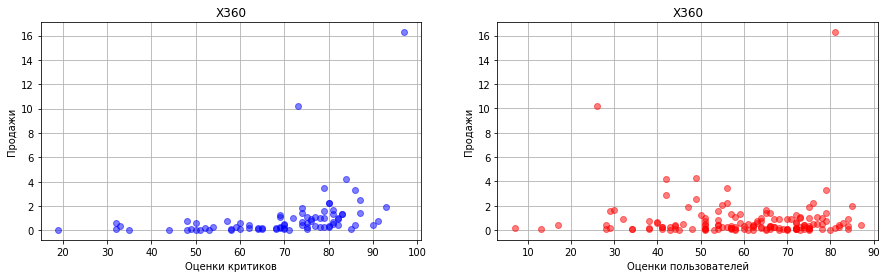

Платформа PS3
	Коэфф. корреляции оценки критиков и продаж - 0.2784621201968551
	Коэфф. корреляции оценки пользователей и продаж - 0.20253769161715865



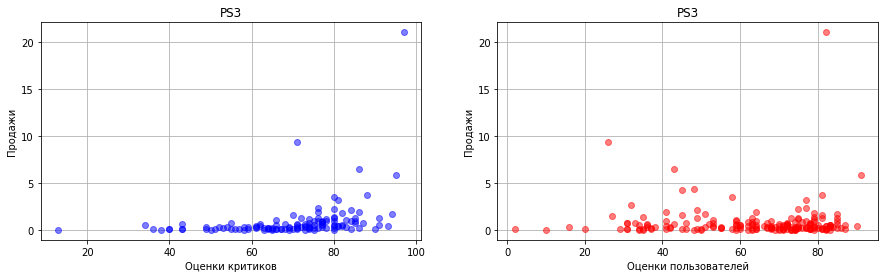

Платформа XOne
	Коэфф. корреляции оценки критиков и продаж - 0.27378217261702115
	Коэфф. корреляции оценки пользователей и продаж - 0.1171512808506198



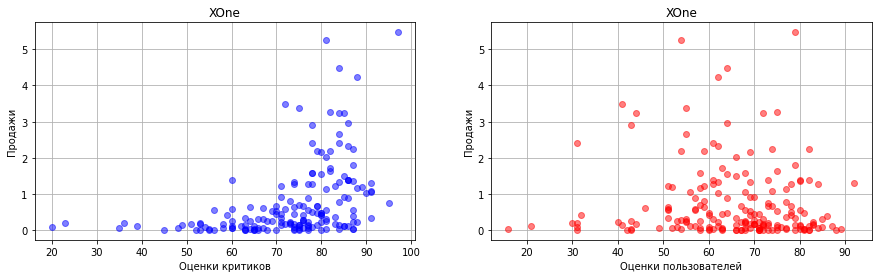

Платформа 3DS
	Коэфф. корреляции оценки критиков и продаж - 0.060809027021315396
	Коэфф. корреляции оценки пользователей и продаж - 0.04726998488213331



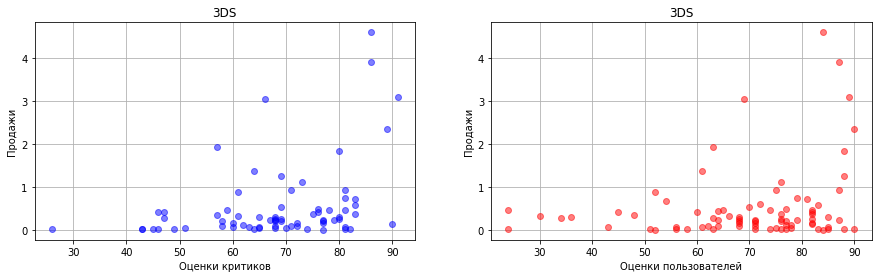

Платформа WiiU
	Коэфф. корреляции оценки критиков и продаж - 0.29318140014748445
	Коэфф. корреляции оценки пользователей и продаж - 0.2514502787639264



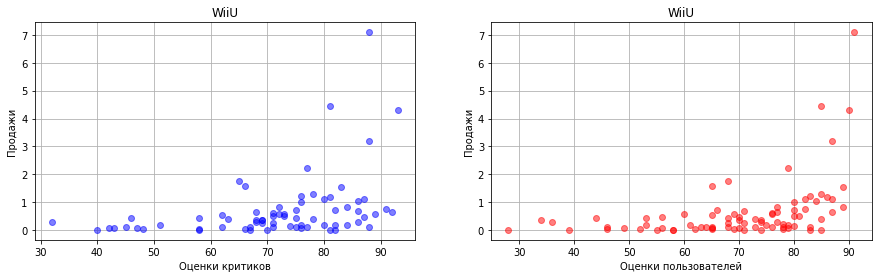

In [57]:
# Создадим функцию, которая отображает диаграмму рассеяния
def scatter_score_and_sales(data, platform):
    '''
    Отображает 2 диаграммы рассеяния:
    Слева - зависимость продаж от оценки критиков;
    Справа - зависимость продаж от оценок пользователей;
    Отображает коэффициенты корряляции продаж и оценок критиков и пользователей.
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    pl_data = data[data['platform'] == platform]
    ax[0].plot(pl_data[pl_data['critic_score'] != -1]['critic_score'],
               pl_data[pl_data['critic_score'] != -1]['total_sales'], 
               'o', color='b', alpha=0.5)
    ax[0].grid()
    ax[0].set(xlabel='Оценки критиков', ylabel='Продажи', title=f'{platform}')
    
    ax[1].plot(pl_data[pl_data['user_score'] != -1]['user_score'],
               pl_data[pl_data['user_score'] != -1]['total_sales'], 
               'o', color='r', alpha=0.5)
    ax[1].grid()
    ax[1].set(xlabel='Оценки пользователей', ylabel='Продажи', title=f'{platform}')
    
    print(f'Платформа {platform}')
    print(f"\tКоэфф. корреляции оценки критиков и продаж - {pl_data['critic_score'].corr(pl_data['total_sales'])}")
    print(f"\tКоэфф. корреляции оценки пользователей и продаж - {pl_data['user_score'].corr(pl_data['total_sales'])}\n")
    plt.show()
    

# Вызовем функцию построения диаграмм и подсчета корреляции для интересующих нас платформ.
for platform in actual_platforms:
    scatter_score_and_sales(actual_data, platform)


**Исходя из коэффициентов корреляции по остальным перспективным платформам можно сделать вывод:**

- По диаграмма размаха и коэффиценту корреляции видно, что , в целом, есть слабая связь между оценками критиков и продажами видеоигр.

- Игры высокими и низкими оценками критиков могут одинаково продоваться, но у игр с большими продажами, почти всегда высокие оценки критиков.

- Более слабая связь общих продаж игр с оценками пользователей, в некоторых случаях связи нет.

### Распределение игр по жанрам

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


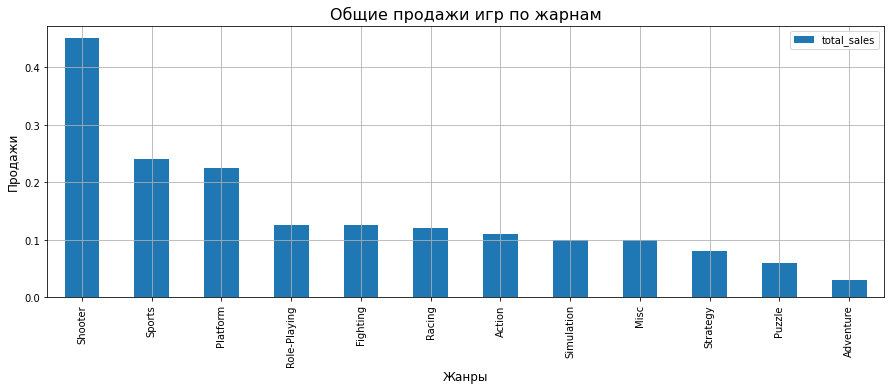

In [58]:
# Выведем подажи игр по жанрам (медианное значение)
display(actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False))

actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(15, 5));

plt.title('Общие продажи игр по жарнам', fontsize=16)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.grid()
plt.show()

In [59]:
# Посмотрим на самую продоваемую игру.
actual_data[actual_data['total_sales'] == max(actual_data['total_sales'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05


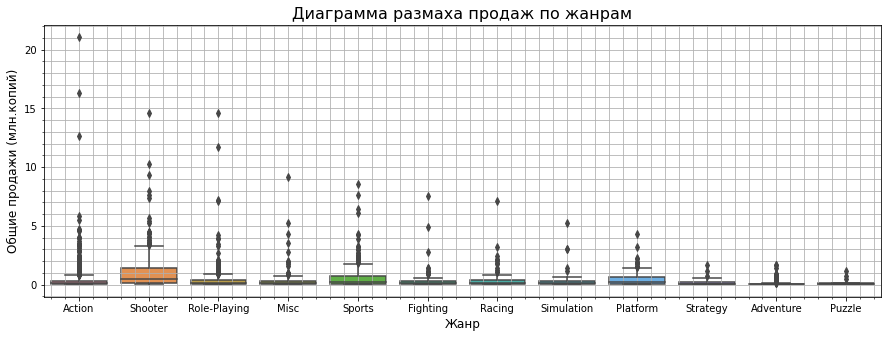

In [60]:
# Построим диаграмму размаха по продажам жанрам за актуальный период
plt.figure(figsize=(15, 5))

plt.title('Диаграмма размаха продаж по жанрам', fontsize=16)
sns.boxplot(x=actual_data['genre'],
            y=actual_data['total_sales'])

plt.minorticks_on()
plt.grid(which='both')
plt.ylabel('Общие продажи (млн.копий)', fontsize=12)
plt.xlabel('Жанр', fontsize=12)

plt.show()

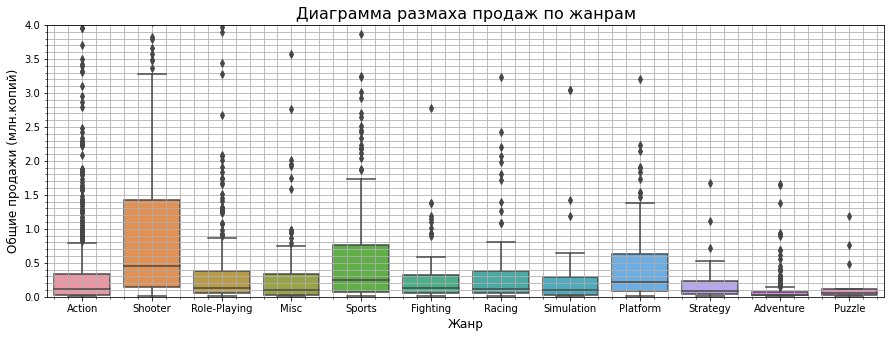

In [61]:
plt.figure(figsize=(15, 5))

plt.title('Диаграмма размаха продаж по жанрам', fontsize=16)
sns.boxplot(x=actual_data['genre'],
            y=actual_data['total_sales'])

plt.minorticks_on()
plt.grid(which='both')
plt.ylim(0, 4)
plt.ylabel('Общие продажи (млн.копий)', fontsize=12)
plt.xlabel('Жанр', fontsize=12)

plt.show()

**Можно разделить жанры игр на 3 категории по медианным продажам**

***1. Высокие продажи более 0.2 млн.копий:***
 - **Shooter** - наибольшие продажи (0.45 млн.копий)
 - **Sports**
 - **Platform** 
 
 
***2. Средние продажи более 0.1 млн.копий:***
 - **Role-Playing**
 - **Fighting**
 - **Rasing**
 - **Action**
 - **Simulation**
 - **Misc**


***3. Низкие продажи до 0.1 млн. копий:***
 - **Strategy**
 - **Puzzle** 
 - **Adventure** - самые низкие продажи (0.03 млн. копий)
 
По жанрам Shooter, Sports и Platform самые большие размахи продаж, самый маленький размах у жанров Adventure и Puzzle.

Самая продоваемая игра в жанре Action - Grand Theft Auto V, c продажами больше 21 млн.копий.


### Общий вывод по разделу

В результате проделанной выше работы были сделаны следующие выводы:
 - Срок жизни платформы, в среднем, составляет 10 лет, исключением является ПК (игры выпускаются на протяжении более 30 лет);
 - Наиболее перспективными платформами на 2017 год являются **PC, PS4, XOne, PSV**;
 - Игры для консолей продаются гораздо лучше игр для мобильных платформ, как по медианным продажам, так и по максимальным продажам, исключением является платформа Nintendo Wii U;
 - Есть слабая связь между оценкой критиков и общими продажими игр, можно предположить, что чем выше оценки критиков, больше вероятность того, что игра будет лучше продоваться;
 - Нет связи между оценками пользователей и продажами игр;
 - Самые большие медианные продажи игр приходятся на жанры: **Shooter, Sports** и **Platform**
 

## Определение портрета пользователя каждого региона

In [62]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,NA,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,NA,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62


### Определим самые популярные платформы для регионов 

In [63]:
# Выведем топ-5 самых популярных платформ для региона NA
display(actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [64]:
# Выведем топ-5 самых популярных платформ для региона EU
display(actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).head())

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [65]:
# Выведем топ-5 самых популярных платформ для региона JP
display(actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).head())

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


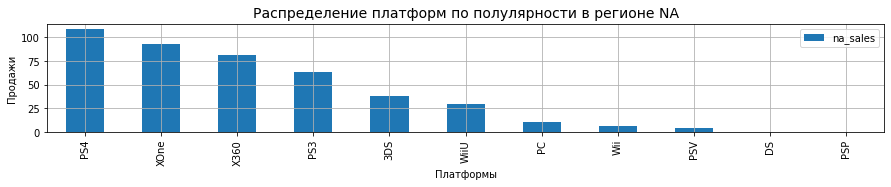

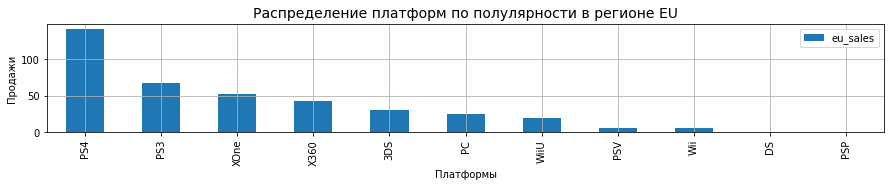

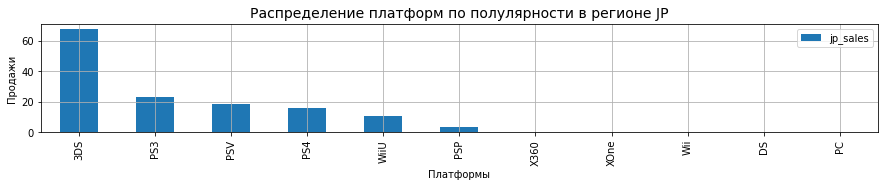

In [66]:
# Построим график по полулярности для всех платформ в регионе NA
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,2), grid=True);
plt.title('Распределение платформ по полулярности в регионе NA', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Платформы')

# Построим график по полулярности для всех платформ в регионе EU
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(15,2), grid=True);
plt.title('Распределение платформ по полулярности в регионе EU', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Платформы')

# Построим график по полулярности для всех платформ в регионе EU
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(15,2), grid=True);
plt.title('Распределение платформ по полулярности в регионе JP', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Платформы')

plt.show()

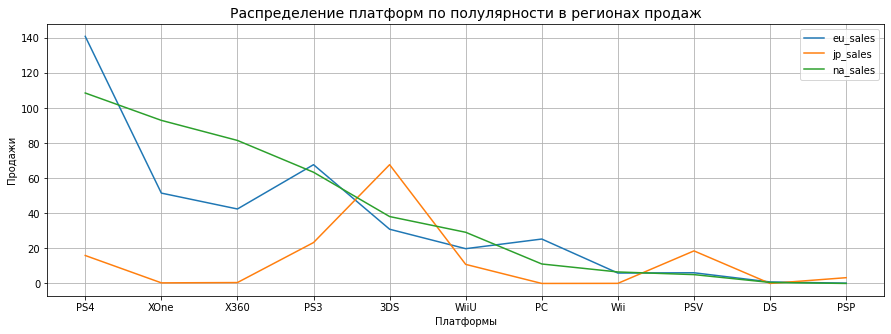

In [67]:
# Построим график по полулярности для всех платформ в регионах
popular_platform = actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], \
                                           aggfunc='sum').sort_values(by='na_sales', ascending=False)

popular_platform.plot(grid=True, figsize=(15,5));

plt.title('Распределение платформ по полулярности в регионах продаж', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.xticks(np.arange(len(popular_platform)), popular_platform.index)

plt.show()

В регионе **NA (Северная Америка)** и **EU (Европа)** самыми популярными платформами являются: **PS4, PS3, XOne, X360 и 3DS.** 
Платформы  **PS4, PS3 и XOne, X360** являются прямыми конкурентами.
Лидирующая мобильная платформа Nintendo 3DS.

В регионе **JP** наиболее популярными платформами являются: **3DS, PS3, PSV, PS4, WiiU**.
В регионе наиболее популярными платформами являются мобильные платфромы (**3DS, PSV, WiiU**).
Все самые популярные платформы местного происхождения.

По графику можно увидеть, что в Европе и Америке, в целом, схожие предпочтения по платформам.

### Определим самые популярные жанры для регионов

In [68]:
# Выведем топ-5 самых популярных жанров для региона NA
display(actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [69]:
# Выведем топ-5 самых популярных жанров для региона EU
display(actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).head())

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [70]:
# Выведем топ-5 самых популярных жанров для региона JP
display(actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).head())

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


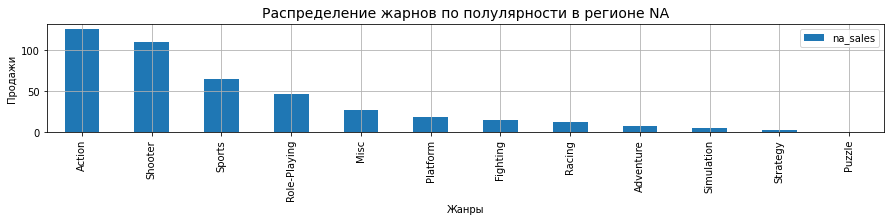

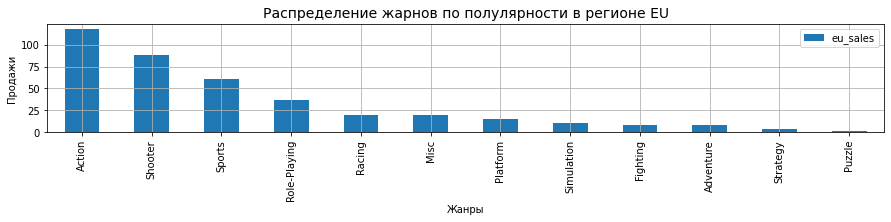

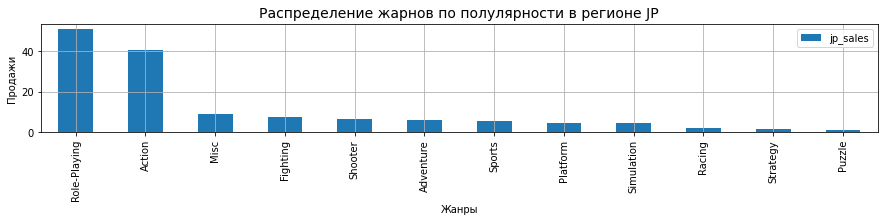

In [71]:
# Построим график по полулярности для всех жанров в регионе NA
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,2), grid=True);
plt.title('Распределение жарнов по полулярности в регионе NA', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Жанры')

# Построим график по полулярности для всех жанров в регионе EU
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(15,2), grid=True);
plt.title('Распределение жарнов по полулярности в регионе EU', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Жанры')

# Построим график по полулярности для всех жанров в регионе JP
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(15,2), grid=True);
plt.title('Распределение жарнов по полулярности в регионе JP', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Жанры')

plt.show()

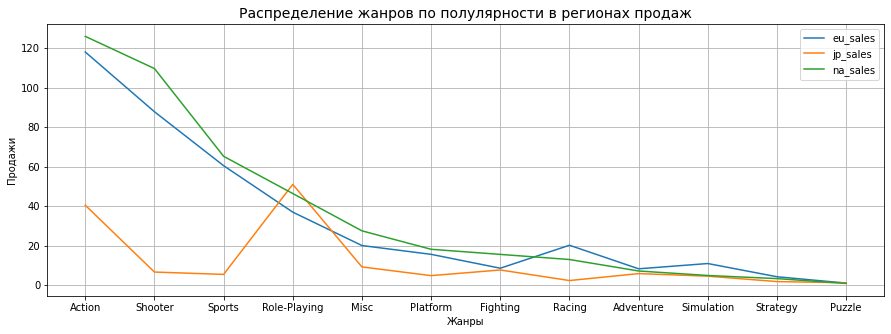

In [72]:
popular_genres = actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], \
                                         aggfunc='sum').sort_values(by='na_sales', ascending=False)

popular_genres.plot(grid=True, figsize=(15,5));

plt.title('Распределение жанров по полулярности в регионах продаж', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.xticks(np.arange(len(popular_genres)), popular_genres.index)

plt.show()

В регионах **NA (Северная Америка)** и **EU (Европа)** самыми популярными жанрами являются: **Action, Shooter, Sports, Role-Playing**, отличается только 5 по популярности жанр, **в Северной Америке - Misc, а в Европе - Rasing**

В регионе JP наиболее популярными являются: **Role-Playing, Action, Misc, Fighting и Shooter.**

Различие в жанрах, возможно, обусловлено культурными различиями, т.к по графику можно увидеть, что в Северной Америке и Европе примерно одинаковое распределения жанров по пулярности. 

### Определим влияет ли рейтинг ESRB на продажи в регионах

,eu_sales,jp_sales,na_sales
rating,,,
M,145.32,14.11,165.21
NA,78.91,85.05,89.42
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
T,41.95,20.59,49.79


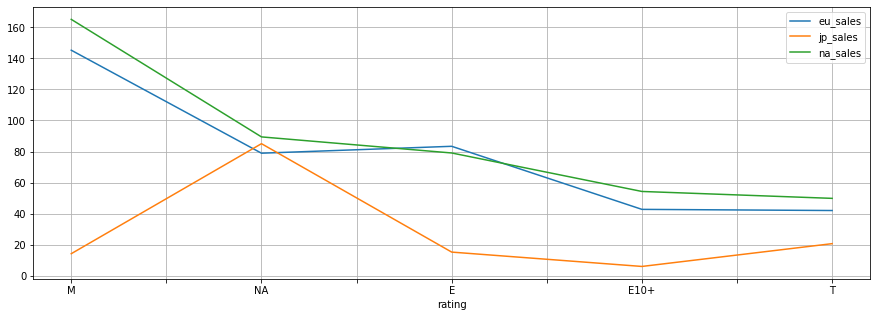

In [73]:
display(actual_data.pivot_table(index='rating', 
                                values=['na_sales', 'eu_sales', 'jp_sales'], 
                                aggfunc='sum').sort_values(by='na_sales', ascending=False))

actual_data.pivot_table(index='rating', 
                        values=['na_sales', 'eu_sales', 'jp_sales'], 
                        aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(grid=True, figsize=(15,5));

По графику видно, что в **Северной Америке и Европе** наиболее попуроярны игры с рейтингом **M - Для взрослых (Mature)**, далее идут рейтинги **NA - не определено** и **E - для всех** (примерно одинаковые продажи)

В **Японии** наиболее популярны игры с рейтингом **NA - не определено**, вероятнее всего это связано с тем, что рейтинг ESRB предназначен для игр для США и Канады, т.е. можно предположить, что в Японии наиболее популярны игры, выпущенные в самой Японии.

### Общий вывод по разделу

В ходе проведенного анализа пользователей в различных регионах было выявлено:
1. Пользователи в Северной Америка и Европе схожи по предпочтениям в платформах и жанрах игр, а также по возрастному рейтингу.
 - Наиболее предпочитаемыми платформами являются **PS4, PS3, XOne, X360 и 3DS**.
 - Наиболее предпочитаемые жанры - **Action, Shooter, Sports, Role-Playing**, отличается только 5 по популярности жанр, в **Северной Америке - Misc**, а в **Европе - Rasing**
 - Наиболее популярные игры в рейтингом **M - Для взрослых (Mature)**.
 
 
2. Пользователи в Японии отличаются от пользователей из Северной Америки и Европы.
 - Наиболее предпочитаемыми платформами являются **3DS, PS3, PSV, PS4, WiiU**. В регионе наиболее популярными платформами являются мобильные платфромы (**3DS, PSV, WiiU**)
 - Наиболее предпочитаемые жанры - **Role-Playing, Action, Misc, Fighting и Shooter.**
 - Наиболее популярные игры в рейтингом **NA - Не определено**, предположительно игры выпущенные в Японии.

## Проверка гипотез.

В ходе статистической проверки гипотез рассмотрим:
1. Одинаковые ли пользовательские рейтинги платформ Xbox One и PC
2. Разные ли пользовательские рейтинги жанров Action и Sports

### Проверим гипотезу одинаковые ли пользовательские рейтинги платформ Xbox One и PC

In [74]:
actual_data.year_of_release.min()

2013

In [75]:
# Комментарий ревьюера 2
data.year_of_release.min()

1980

In [76]:
# Создадим срез данных по платформам XOne и PC с выставленными оценками 
data_xone_pc = actual_data.query('(platform == "XOne" or platform == "PC") and user_score != -1')
data_xone_pc['platform'].unique()

array(['XOne', 'PC'], dtype=object)

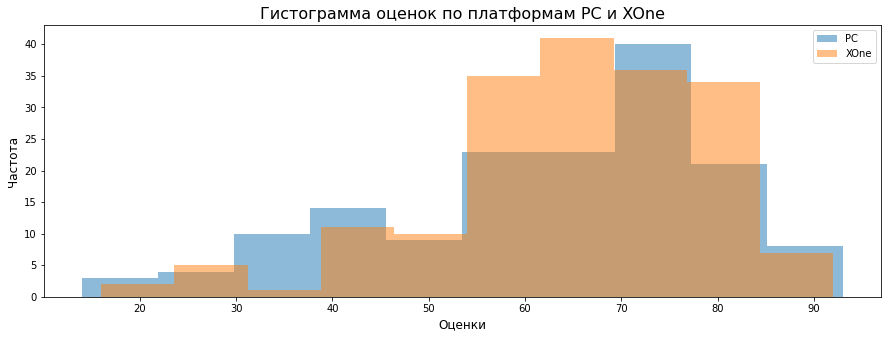

In [77]:
# Построим гистограмму распределений оценок пользователей
data_xone_pc.groupby('platform')['user_score'].plot(kind='hist', bins=10, alpha=0.5, figsize=(15,5));

plt.legend(['PC','XOne'])
plt.title('Гистограмма оценок по платформам PC и XOne', fontsize=16)
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

In [78]:
(data_xone_pc.loc[data_xone_pc['platform'] == 'XOne']['user_score']).var()

190.69968429360694

Проверка гипотезы:

Проверяем двухсторонюю гипотезу.

- Н_0: Пользовательские рейтинги платформ Xbox One и PC **равны.**
- Н_а: Пользовательские рейтинги платформ Xbox One и PC **не равны.**
```
H_0: Оценки (user_score) пользователей "Xbox One" = оценке (user_score) пользователей "PC"`
H_a: Оценка (user_score) пользователей "Xbox One" ≠ оценке (user_score) пользователей "PC"`
alpha = 0.05
```
Нулевая гипотеза формируется так, чтобы использовался знак равенства.

В связи с тем, что мы проверяем среднее в двух генеральных совокупностях, используем метод `scipy.stats.ttest_ind`

In [79]:
# Посмотрим дисперисию по совокупностям
data_xone_pc.pivot_table(index='platform', values='user_score', aggfunc='var')

,user_score
platform,
PC,303.589275
XOne,190.699684


Параметр `equal_var` будет выбран `False`, т.к. дисперсия довольно сильно отличается.

In [80]:
results = st.ttest_ind(data_xone_pc.loc[data_xone_pc['platform'] == 'XOne']['user_score'],
                       data_xone_pc.loc[data_xone_pc['platform'] == 'PC']['user_score'],
                       equal_var=False)

# Зададим критический уровень статистической значимости
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


В результате проверки гипотезы, мы не смогои отвергнуть нулевую гипотезу. Можно сказать, что пользовательские оценки для платформ Xbox One и PC **схожи**.

### Проверим гипотезу разные ли пользовательские рейтинги жанров Action и Sports

In [81]:
# Создадим срез данных по жанрам Action и Sports с выставленными оценками 
data_action_sports = actual_data.query('(genre == "Action" or genre == "Sports") and user_score != -1')
data_action_sports['genre'].unique()

array(['Action', 'Sports'], dtype=object)

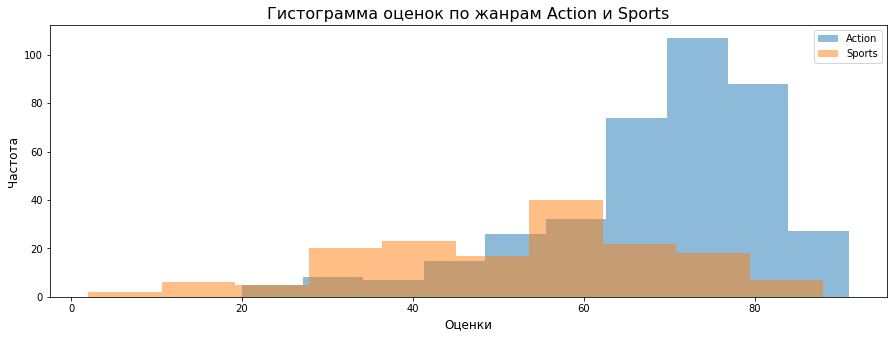

In [82]:
# Построим гистограмму распределений оценок пользователей
data_action_sports.groupby('genre')['user_score'].plot(kind='hist', bins=10, alpha=0.5, figsize=(15,5));

plt.legend(['Action','Sports'])
plt.title('Гистограмма оценок по жанрам Action и Sports', fontsize=16)
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

Проверка гипотезы:

Проверяем двухсторонюю гипотезу.

- H_0 - Пользовательские рейтинги для жанров Action и Sports **равны.**
- H_a - Пользовательские рейтинги для жанров Action и Sports **не равны.**

```
H_0: Оценки (user_score) для жанра "Action" = оценке (user_score) для жанра "Sports"`
H_a: Оценки (user_score) для жанра "Action" ≠ оценке (user_score) для жанра "Sports"`
alpha = 0.05
```
Нулевая гипотеза формируется так, чтобы использовался знак равенства.

В связи с тем, что мы проверяем среднее в двух генеральных совокупностях, используем метод `scipy.stats.ttest_ind`

In [83]:
# Посмотрим дисперисию по совокупностям
data_action_sports.pivot_table(index='genre', values='user_score', aggfunc='var')

,user_score
genre,
Action,176.936090
Sports,318.061281


Параметр `equal_var` будет выбран `False`, т.к. дисперсия довольно сильно отличается.

In [84]:
results = st.ttest_ind(data_action_sports.loc[data_action_sports['genre'] == 'Action']['user_score'],
                       data_action_sports.loc[data_action_sports['genre'] == 'Sports']['user_score'],
                       equal_var=False)

# Зададим критический уровень статистической значимости
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.446003970070494e-20
Отвергаем нулевую гипотезу


В результате проверки гипотезы, мы отвернули нулевую гипотезу и приняли альтернативную гипотезу. В результате мы выявили, что пользовательские оценки для жанров Action и Sport **не равны**.

### Вывод по разделу

В ходе статистической проверки гипотез мы рассмотрели:

**1. Одинаковые ли пользовательские рейтинги платформ Xbox One и PC.**

При проверке гипотезы получили значение p-значение: 0.1475959401343053, что не позволило нам отвергнуть нулевую гипотезу о равенстве пользовательских рейтингов для платформ. 

В результате можно сказать, что **пользовательские оценки для платформ Xbox One и PC схожи.**


**2. Разные ли пользовательские рейтинги жанров Action и Sports.**

При проверке гипотезы получили значение p-значение: 1.446003970070494e-20, что позволило нам отвергнуть нулевую гипотезу. 

В результате проверки гипотезы, мы выявили, что **пользовательские оценки для жанров Action и Sport не равны.**

## Общий вывод

Была изучена выборка о продажах видеоигр, за 36 лет (с 1980 по 2016 гг.). 
Целью проведенного анализа необходимо было выявить наиболее перспективные платформы для продажи игр на 2017 год.

В ходе проведенного анализа был проведен анализ пользователей различных регионов, составили портреты пользователей для Северной Америки, Европы и Японии.

В результате было выявлено:
1. Срок жизни платформы в среднем составляет 10 лет, исключением является ПК.
2. Есть прямая корреляция между оценками критиков и общими продажами игр.
3. Пользователи в Северной Америка и Европе схожи по предпочтениям в платформах и жанрах игр, а также по возрастному рейтингу, а пользователи Японии отличаюся от пользователей Европы и Северной Америки.
4. В Европе и Северной Америки наиболее популярные игры в рейтингом M - Для взрослых (Mature), в Японии - с рейтингом NA - не опреледелено, предполагается, что это игры выпущенные в Японии, т.к. рейтинг ESRB выставляется для стран Северной Америки.
5. Пользователи в Японии предпочитают мобильные платфромы (3DS, PSV, WiiU).
6. Наиболее перспективными платформами на 2016 год являются PC, PS4, XOne, PSV.
7. При проведении статистического анализа было выявлено:
 - Пользовательские оценки для платформ Xbox One и PC схожи.
 - Пользовательские оценки для жанров Action и Sport не равны.

Нужно отметить, что планировании продаж в необходимо отдельно учитывать Японский рынок, т.к. портрет пользователя сильно отличается от пользователей Северной Америки и Европы. В Японии популярна платформа Nintendo 3DS, которую можно также считать перспективной, в плане подаж, на 2017 год. Также Японцы больше предпочитают игры выпущенные в Японии. 

